In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 90%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

%reload_ext jupyternotify

#%notify

<IPython.core.display.Javascript object>

In [21]:
import numpy as np
import sys
from qutip import *
import matplotlib.pyplot as plt
from pathlib import Path

from scipy import linalg as la

parent_path = ".." #str(Path(__file__).resolve().parents[1])
sys.path.append(parent_path)

import pysqkit


import time
import os


%matplotlib notebook
plt.rcParams['figure.figsize'] = (10, 7)

In [3]:
from math import pi

h = 6.62607 * 10**(-34)
h_bar = h/(2*pi)
e = 1.6071766*10**(-19)
phi_0 = h/(2*e)


In [4]:
N = 100

# Init

$$\hat{H} = \hat{H}^{(0)}_A + \hat{H}^{(0)}_B + \hat{V} + \hat{H}_{drive}$$

## flx1


$$\hat{H}^{(0)}_A = 4 E_{C,A} \cdot \hat{n}^2_A + \frac{1}{2}E_{L,A}\cdot\hat{\varphi}^2_A - E_{J,A}\cos\left(\hat{\varphi}_A - \phi_{ext,A}\right)$$

In [5]:
e_c_1 = 1*10**9 *h
e_l_1 = 1.5*10**9 *h
e_j_1 = 3.8*10**9 *h
  
flux_1 = 1/2  # 1/2 -> pi dans le cos

flx1 = pysqkit.qubits.Fluxonium(label = "QB1",
                               charge_energy=e_c_1,
                               induct_energy=e_l_1,
                               joseph_energy=e_j_1,
                               flux=flux_1,
                               basis=None,
                               dim_hilbert=N)

In [51]:
#Bare energies

bare_E_1 = la.eig(flx1.hamiltonian())[0].real/h
bare_E_1.sort()
bare_E_1 = bare_E_1*10**(-9)

<IPython.core.display.Javascript object>


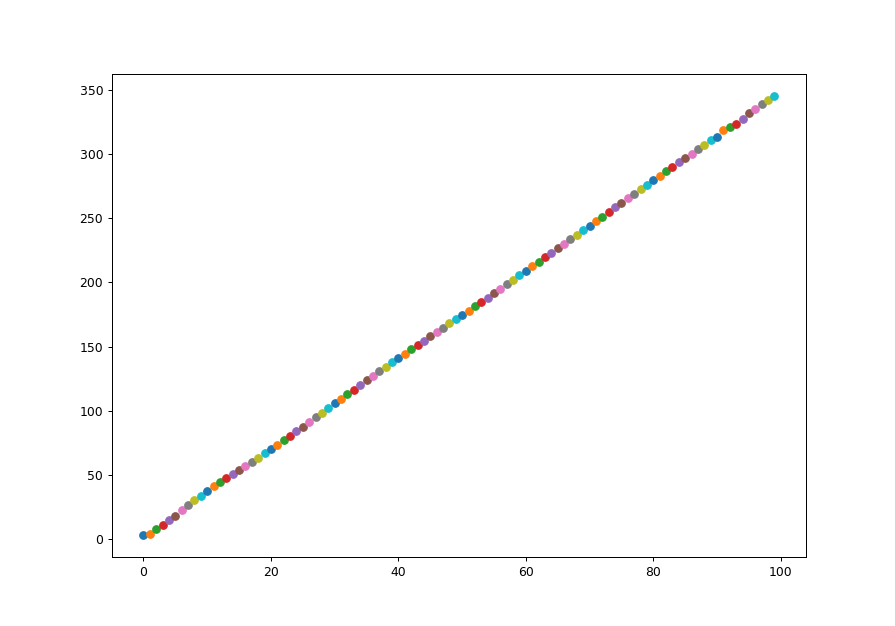

In [52]:
plt.figure()
for i in range(len(bare_E_1)):
    plt.scatter(i, bare_E_1[i])

In [53]:
print("Ground =", bare_E_1[0], "GHz\n1st state =", bare_E_1[1], "GHz\n2nd state =", bare_E_1[2], "GHz" )

print("\n\ndelta 01 =", bare_E_1[1]-bare_E_1[0], "GHz\ndelta 12 =", bare_E_1[2] - bare_E_1[1], "GHz")

Ground = 3.1256059799425424 GHz
1st state = 4.27729980224475 GHz
2nd state = 7.557779606074891 GHz


delta 01 = 1.1516938223022075 GHz
delta 12 = 3.280479803830141 GHz


In [116]:
flx1.charge_op(as_qobj = True)

Quantum object: dims = [[100], [100]], shape = (100, 100), type = oper, isherm = True
Qobj data =
[[0.+0.j         0.-0.46530243j 0.+0.j         ... 0.+0.j
  0.+0.j         0.+0.j        ]
 [0.+0.46530243j 0.+0.j         0.-0.65803701j ... 0.+0.j
  0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.65803701j 0.+0.j         ... 0.+0.j
  0.+0.j         0.+0.j        ]
 ...
 [0.+0.j         0.+0.j         0.+0.j         ... 0.+0.j
  0.-4.60625905j 0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         ... 0.+4.60625905j
  0.+0.j         0.-4.62970072j]
 [0.+0.j         0.+0.j         0.+0.j         ... 0.+0.j
  0.+4.62970072j 0.+0.j        ]]

In [119]:
flx1.charge_zpf*(create(100) - destroy(100))*1j

Quantum object: dims = [[100], [100]], shape = (100, 100), type = oper, isherm = True
Qobj data =
[[0.+0.j         0.-0.46530243j 0.+0.j         ... 0.+0.j
  0.+0.j         0.+0.j        ]
 [0.+0.46530243j 0.+0.j         0.-0.65803701j ... 0.+0.j
  0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.65803701j 0.+0.j         ... 0.+0.j
  0.+0.j         0.+0.j        ]
 ...
 [0.+0.j         0.+0.j         0.+0.j         ... 0.+0.j
  0.-4.60625905j 0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         ... 0.+4.60625905j
  0.+0.j         0.-4.62970072j]
 [0.+0.j         0.+0.j         0.+0.j         ... 0.+0.j
  0.+4.62970072j 0.+0.j        ]]

## flx2

$$\hat{H}^{(0)}_B = 4 E_{C,B} \cdot \hat{n}^2_B + \frac{1}{2}E_{L,B}\cdot\hat{\varphi}^2_B - E_{J,B}\cos\left(\hat{\varphi}_B - \phi_{ext,B}\right)$$

In [63]:
e_c_2 = 1*10**9 *h
e_l_2 = .9*10**9 *h
e_j_2 = 3*10**9 *h

flux_2 = 1/2

flx2 = pysqkit.qubits.Fluxonium(label = "QB2",
                               charge_energy=e_c_2,
                               induct_energy=e_l_2,
                               joseph_energy=e_j_2,
                               flux=flux_2,
                               basis=None,
                               dim_hilbert=N)

## coupling

$$\hat{V} = J_C \cdot \hat{n}_A \cdot \hat{n}_B$$

In [65]:
J_c = 100*10**6 *h
g = J_c#J_c/(4*e**2)

In [67]:
duo = flx1.couple_to(flx2, pysqkit.couplers.capacitive_coupling, strength = g)

In [68]:
duo.bare_hamiltonian(), duo.int_hamiltonian()

(array([[3.44826033e-24+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, ...,
         0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j],
        [0.00000000e+00+0.j, 4.01069882e-24+0.j, 0.00000000e+00+0.j, ...,
         0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j],
        [0.00000000e+00+0.j, 0.00000000e+00+0.j, 5.95123535e-24+0.j, ...,
         0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j],
        ...,
        [0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, ...,
         1.78221914e-23+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j],
        [0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, ...,
         0.00000000e+00+0.j, 1.98679019e-23+0.j, 0.00000000e+00+0.j],
        [0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, ...,
         0.00000000e+00+0.j, 0.00000000e+00+0.j, 2.19547231e-23+0.j]]),
 array([[ 1.27345873e-96+0.j, -5.16807076e-63+0.j,  1.11861713e-77+0.j,
         ..., -4.29807804e-29+0.j,  4.35427614e-4

In [92]:
#Bare energies

bare_E_duo = la.eig(duo.bare_hamiltonian())[0].real/h
bare_E_duo.sort()
bare_E_duo = bare_E_duo[:5]*10**(-9)

int_E_duo = la.eig(duo.int_hamiltonian())[0].real/h
int_E_duo.sort()
int_E_duo = int_E_duo[:5]*10**(-9)

<IPython.core.display.Javascript object>


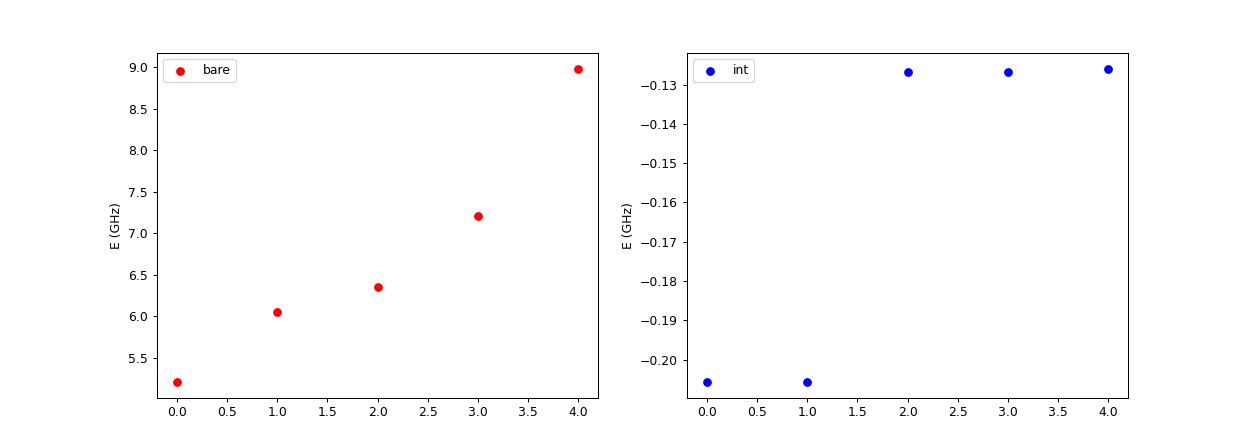

Text(0, 0.5, 'E (GHz)')

In [95]:
fig, axs = plt.subplots(1,2, figsize = (14,5))

axs[0].scatter(range(len(bare_E_duo)), bare_E_duo, c = 'r', label = 'bare')    
axs[1].scatter(range(len(int_E_duo)), int_E_duo, c = 'b', label = 'int')

axs[0].legend()
axs[1].legend()

axs[0].set_ylabel("E (GHz)")
axs[1].set_ylabel("E (GHz)")

<IPython.core.display.Javascript object>


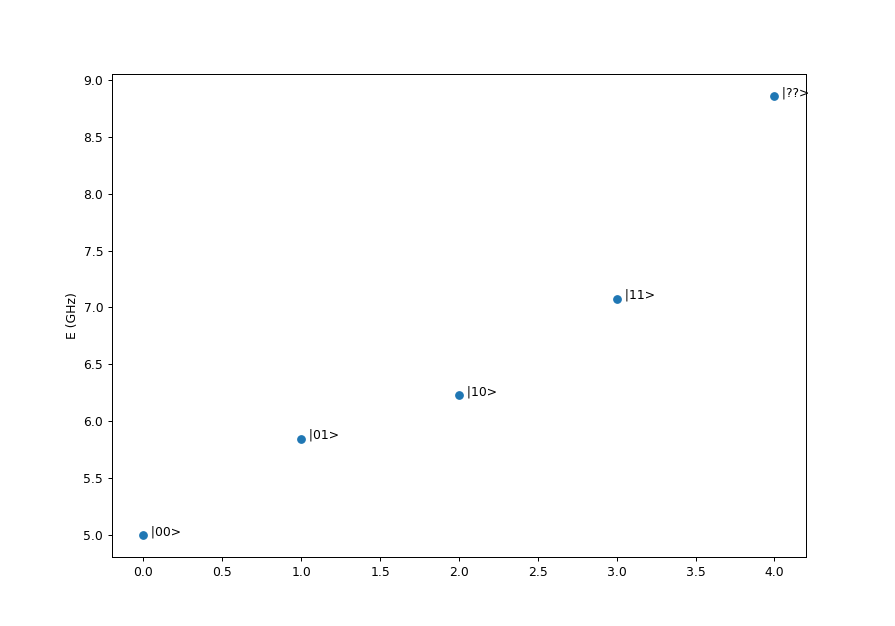

Text(0, 0.5, 'E (GHz)')

In [111]:
E_duo = bare_E_duo + int_E_duo
E_duo.sort()

plt.figure()
plt.scatter(range(len(E_duo)), E_duo)

plt.annotate("  |00>", (0,E_duo[0]))
plt.annotate("  |01>", (1,E_duo[1]))
plt.annotate("  |10>", (2,E_duo[2]))
plt.annotate("  |11>", (3,E_duo[3]))
plt.annotate("  |??>", (4,E_duo[4]))




plt.ylabel('E (GHz)')

In [114]:
print("Ground =", E_duo[0], "GHz\n1st state =", E_duo[1], "GHz\n2nd state =", E_duo[2], "GHz" )

print("\n\nomega 00->01 =", E_duo[1]-E_duo[0], "GHz\nomega 01->10 =", E_duo[2] - E_duo[1], "GHz\nomega 10->11 =", E_duo[3]-E_duo[2], "GHz"
     )

Ground = 4.998338618452368 GHz
1st state = 5.84716527898366 GHz
2nd state = 6.229109762348368 GHz


omega 00->01 = 0.8488266605312917 GHz
omega 01->10 = 0.3819444833647081 GHz
omega 10->11 = 0.8488266605312917 GHz


## Drive

$$\hat{H}_{drive} = 2  f\left( t \right)  \cos \left( \omega_d t + \gamma_d\right) \cdot \left( \eta_A \cdot \hat{n}_A + \eta_B \cdot \hat{n}_B \right)$$

In [ ]:
f = 

omega_d = 
gamma_d = 

eta_1 = 
eta_2 = 

In [123]:
n_1 = flx1.charge_op(as_qobj = True)
n_2 = flx2.charge_op(as_qobj = True)

In [124]:
n_1+n_2 #Rq) only different parity term

Quantum object: dims = [[100], [100]], shape = (100, 100), type = oper, isherm = True
Qobj data =
[[0.+0.j         0.-0.87482056j 0.+0.j         ... 0.+0.j
  0.+0.j         0.+0.j        ]
 [0.+0.87482056j 0.+0.j         0.-1.2371831j  ... 0.+0.j
  0.+0.j         0.+0.j        ]
 [0.+0.j         0.+1.2371831j  0.+0.j         ... 0.+0.j
  0.+0.j         0.+0.j        ]
 ...
 [0.+0.j         0.+0.j         0.+0.j         ... 0.+0.j
  0.-8.66028169j 0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         ... 0.+8.66028169j
  0.+0.j         0.-8.70435466j]
 [0.+0.j         0.+0.j         0.+0.j         ... 0.+0.j
  0.+8.70435466j 0.+0.j        ]]

In [125]:
n_1*n_2 #Rq) only same parity terms

Quantum object: dims = [[100], [100]], shape = (100, 100), type = oper, isherm = True
Qobj data =
[[  0.19054978   0.          -0.26947808 ...   0.           0.
    0.        ]
 [  0.           0.57164934   0.         ...   0.           0.
    0.        ]
 [ -0.26947808   0.           0.9527489  ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...  37.15720721   0.
  -18.76891157]
 [  0.           0.           0.         ...   0.          37.53830677
    0.        ]
 [  0.           0.           0.         ... -18.76891157   0.
   18.86442828]]

In [ ]:
H_drive = 